# YOLO models from ultralytics

This notebook allows you to train and test YOLO models from ultralytics.

Here is a list of available models : https://hub.ultralytics.com/models


In [17]:

from roboflow import Roboflow
rf = Roboflow(api_key="Z4mFtu232oWID8Vtcntw")
project = rf.workspace("testsew").project("only-axis-camera-images")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.2.14, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Only-axis-camera-images-3 in yolov8:: 100%|██████████| 480/480 [00:00<00:00, 12606.15it/s]


In [1]:
import os

path = os.path.join(os.getcwd(), "Only-axis-camera-images-3")
print(path)

/home/nicolastovantrang/Desktop/sew/YOLO/Only-axis-camera-images-3


Choose what version of yolo you want.
| Model | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | Speed<br><sup>CPU ONNX<br>(ms) | Speed<br><sup>A100 TensorRT<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>(B) |
| ----------------------------------------------------------------------------------------- | --------------------- | -------------------- | ------------------------------ | ----------------------------------- | ------------------ | ----------------- |
| [YOLOv8n](https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n-oiv7.pt) | 640 | 18.4 | 142.4 | 1.21 | 3.5 | 10.5 |
| [YOLOv8s](https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s-oiv7.pt) | 640 | 27.7 | 183.1 | 1.40 | 11.4 | 29.7 |
| [YOLOv8m](https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m-oiv7.pt) | 640 | 33.6 | 408.5 | 2.26 | 26.2 | 80.6 |
| [YOLOv8l](https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l-oiv7.pt) | 640 | 34.9 | 596.9 | 2.43 | 44.1 | 167.4 |
| [YOLOv8x](https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-oiv7.pt) | 640 | 36.3 | 860.6 | 3.56 | 68.7 | 260.6 |


In [2]:
!yolo mode=train model=yolov8l.pt data={path}/data.yaml epochs=150 imgsz=640 batch=16

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/nicolastovantrang/Desktop/sew/YOLO/Only-axis-camera-images-3/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

In [10]:
from ultralytics import YOLO

model = YOLO("runs/detect/train10/weights/best.pt")

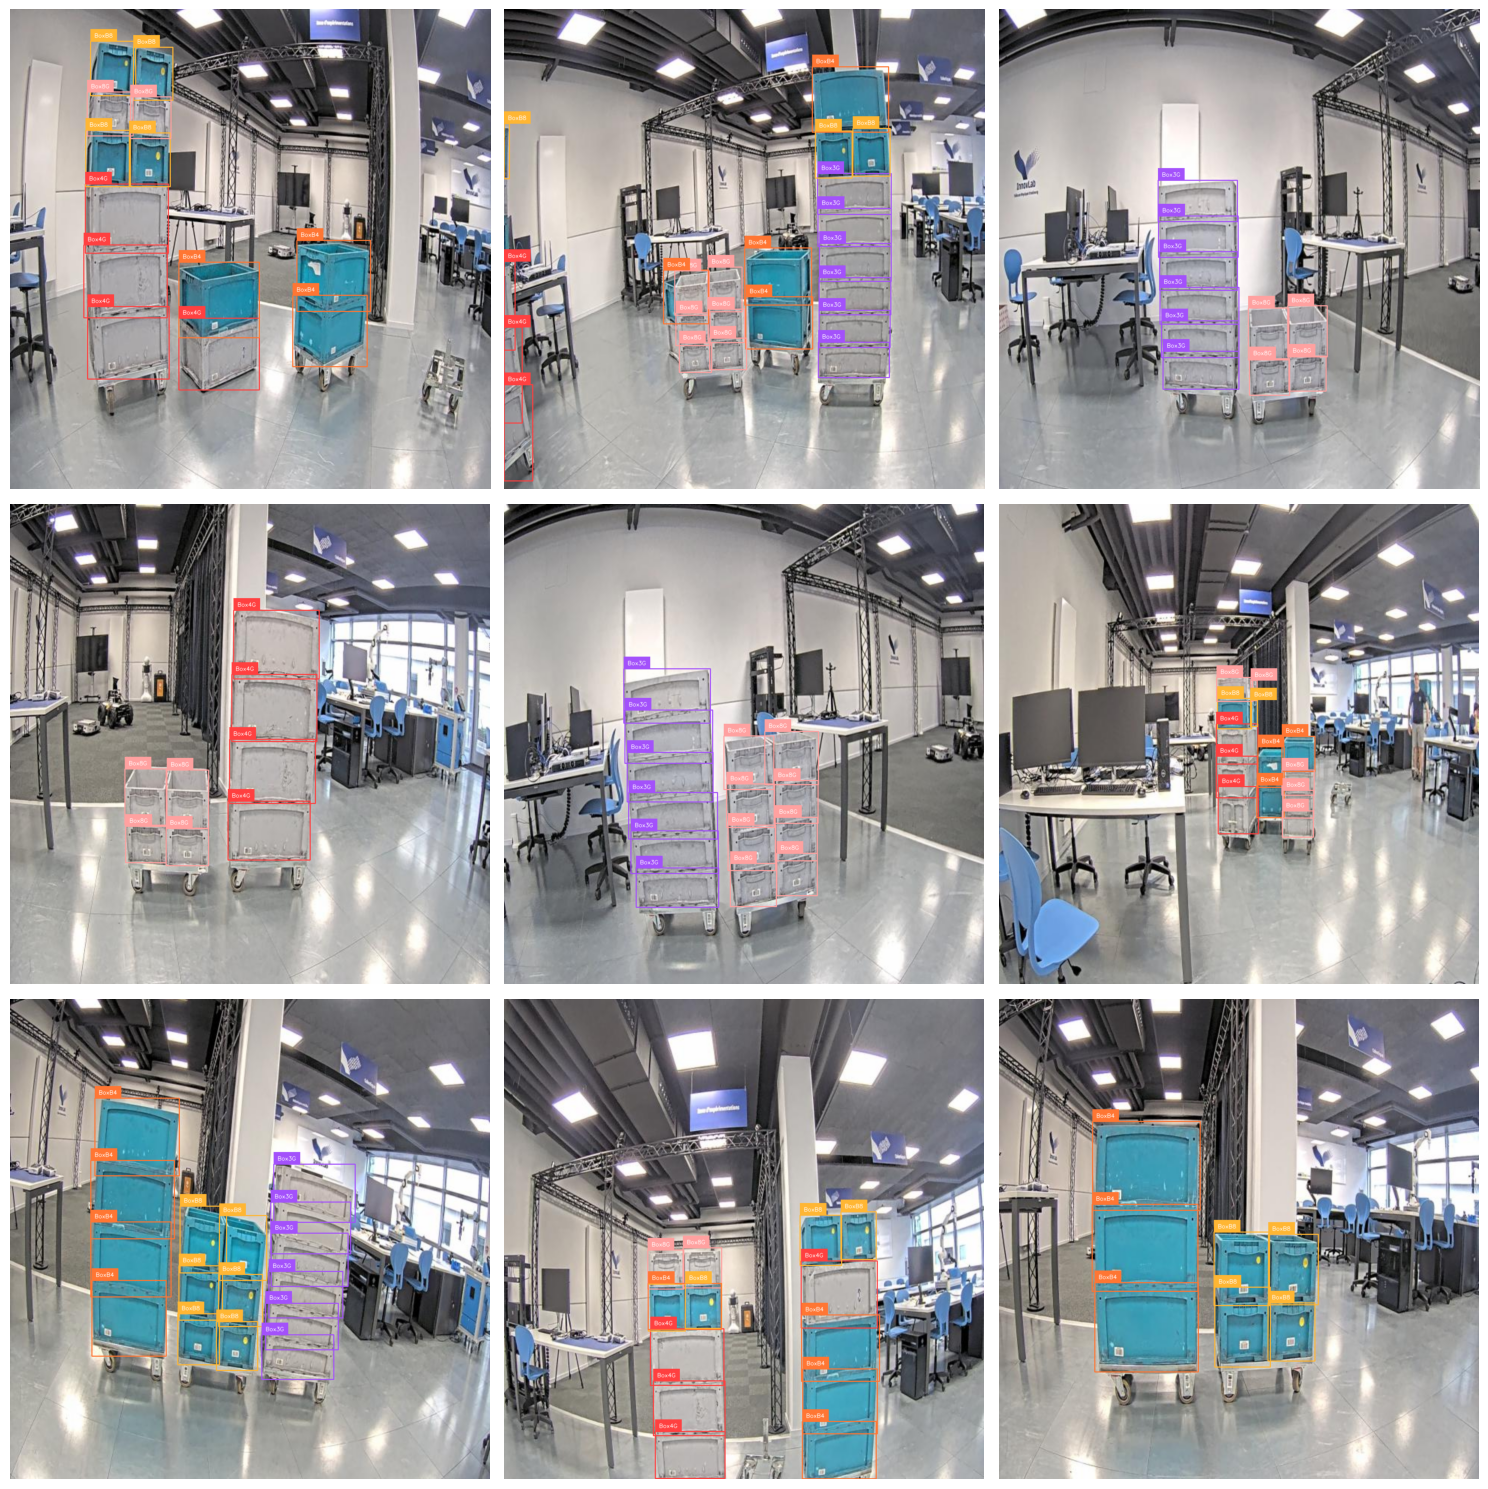

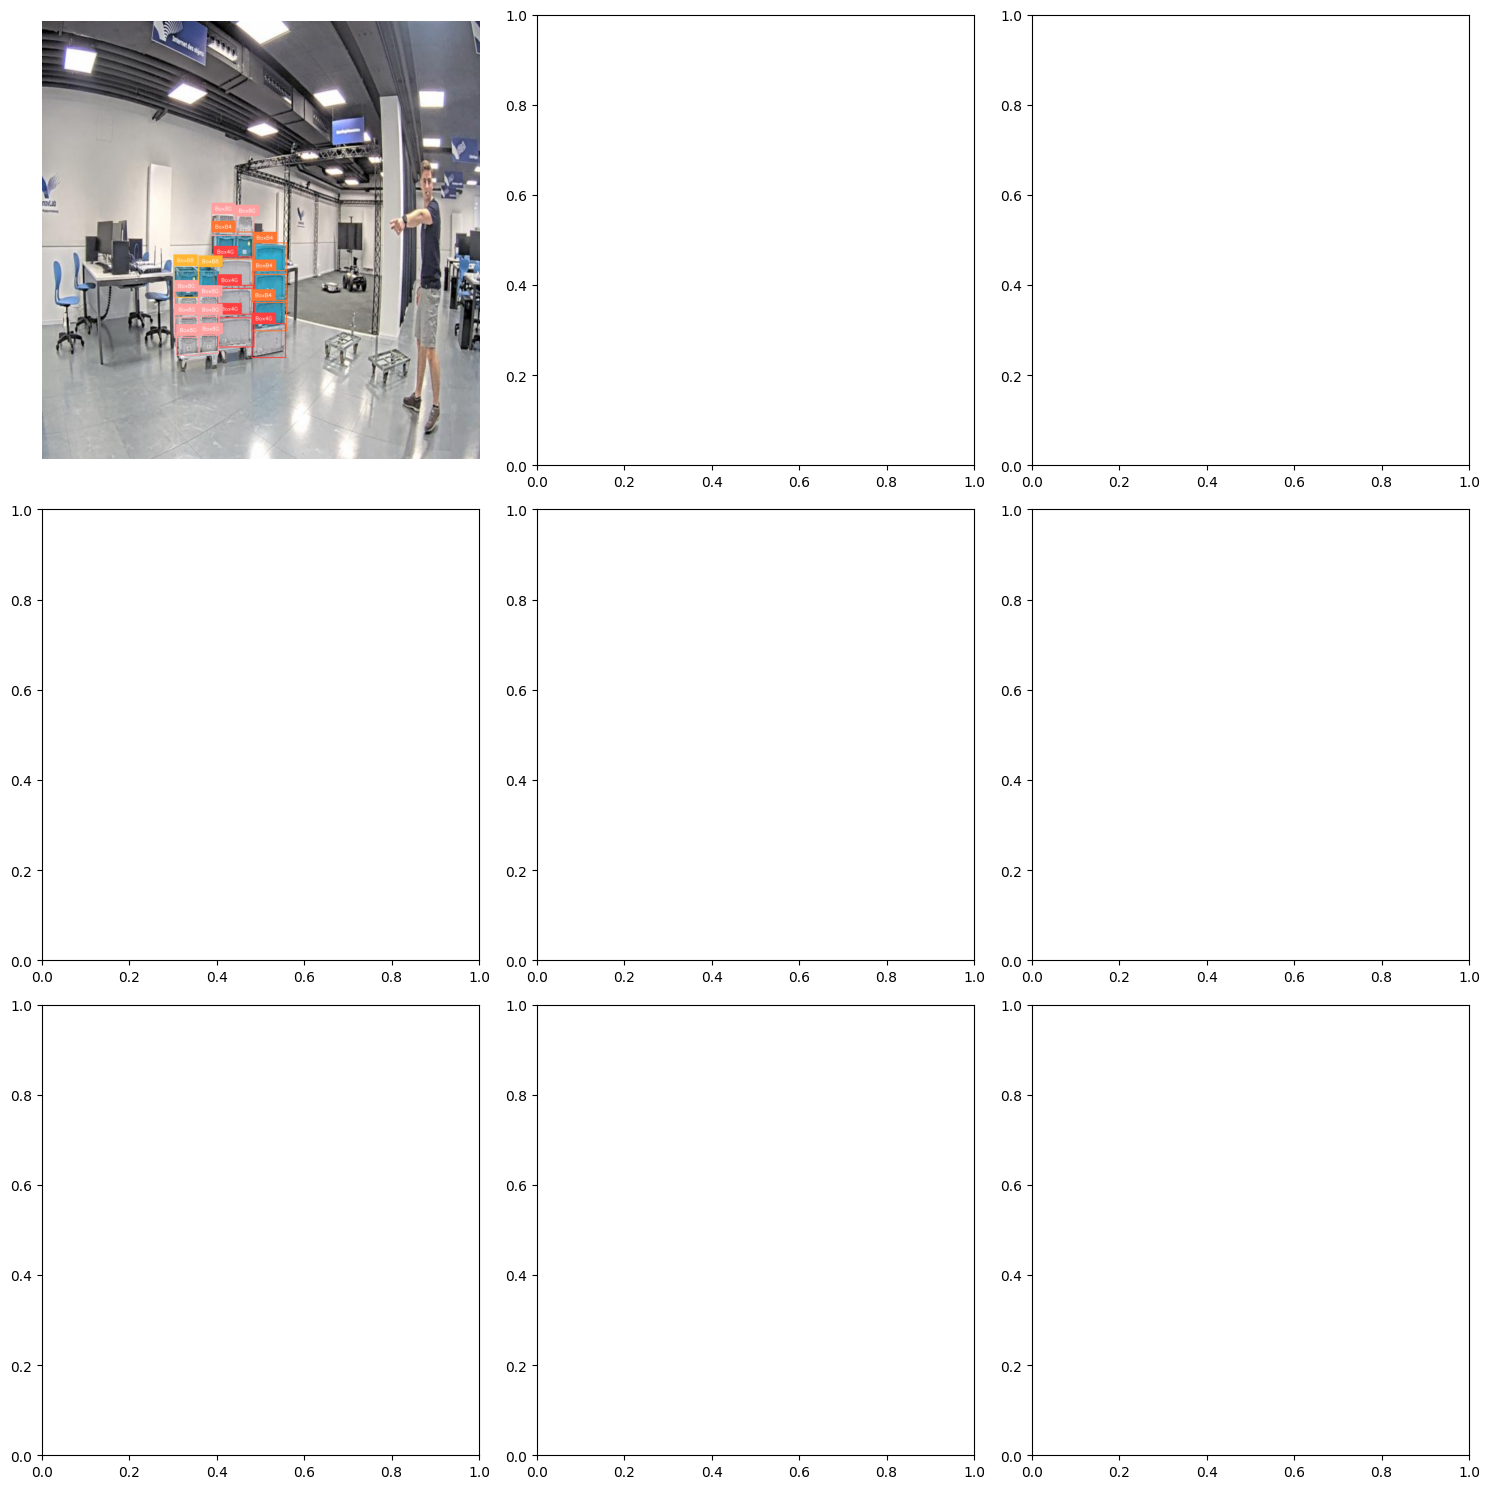

In [11]:
import glob
import cv2
import supervision as sv
import matplotlib.pyplot as plt
import math

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

image_paths = glob.glob(f"{path}/test/images/*.jpg")
num_images = len(image_paths)

# Determine the number of grids
num_grids = math.ceil(num_images / 9)

# Iterate over each grid
for grid in range(num_grids):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid of subplots

    # Get the images for this grid
    grid_image_paths = image_paths[grid * 9 : (grid + 1) * 9]

    for ax, image_path in zip(axs.flatten(), grid_image_paths):
        image = cv2.imread(image_path)
        image = cv2.resize(image, (1280, 1280))
        results = model.predict(image, verbose=False, iou=0.4, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(results)
        labels = [model.model.names[class_id] for class_id in detections.class_id]
        annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
        annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
        ax.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Test

In [12]:
model.val()

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)


val: Scanning /home/nicolastovantrang/Desktop/sew/Only-axis-camera-images-2/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


                   all         15        217      0.893       0.83      0.892      0.686
                 Box3G         15         52      0.872      0.712      0.809      0.603
                 Box4G         15         29      0.861      0.862      0.905      0.714
                 Box8G         15         59      0.939      0.814      0.857      0.649
                 BoxB4         15         32      0.869      0.875       0.94      0.745
                 BoxB8         15         45      0.925      0.889       0.95      0.716
Speed: 0.1ms preprocess, 14.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f79b0593130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Video rendering

## Used to generate annotated video from model and video.

When the model is not fast enough to run in real-time, it can be useful to generate a video with the model's predictions.
Showing its strength and weaknesses in a more visual way.


In [13]:
import supervision as sv
import cv2
import os
from tqdm import tqdm


def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames


def save_video(output_video_frames, output_video_path):
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    out = cv2.VideoWriter(output_video_path, fourcc, 24, (output_video_frames[0].shape[1], output_video_frames[0].shape[0]))
    for frame in output_video_frames:
        out.write(frame)
    out.release()


bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


def render_video(video_path, output_video_path):
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"File {video_path} does not exist")
    frames = read_video(video_path)
    output_video_frames = []
    for frame in tqdm(frames, desc="Processing frames"):
        frame = cv2.resize(frame, (1280, 1280))
        results = model(frame, iou=0.4, conf=0.3)[0]
        detections = sv.Detections.from_ultralytics(results)
        labels = [model.model.names[class_id] for class_id in detections.class_id]
        annotated_frame = bounding_box_annotator.annotate(scene=frame, detections=detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)
        output_video_frames.append(annotated_frame)
    save_video(output_video_frames, output_video_path)


In [16]:
video_path = "../data/videos/VID20240408175741.mp4"
output_video_path = "output.mp4"
render_video(video_path, output_video_path)

Processing frames: 100%|██████████| 980/980 [00:20<00:00, 48.94it/s]
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
